In [31]:
import sys

package_path = '/home/zjh/graph_embedding/src'
if package_path not in sys.path:
    sys.path.append(package_path)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from running import rw_directory
from model.synthetic_graph import load_fork_tree
import mpl_toolkits.axisartist as axisartist

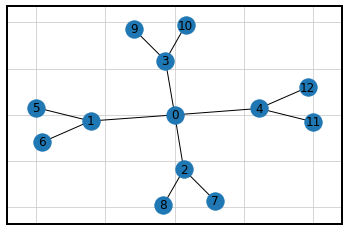

In [33]:
# g = nx.Graph()
# g.add_nodes_from([0,1,2,3])
# g.add_edges_from([(0,1),(1,2),(2,3)])
# nx.draw_networkx(g,with_labels=True)

# forks = [1,4,2,2]
forks = [4,2]
g, all_level_nodes = load_fork_tree(forks)
nx.draw_networkx(g,with_labels=True)
file_name = rw_directory.result_path(10, 'fork_tree.pdf')
plt.savefig(file_name)

In [34]:
L = nx.laplacian_matrix(g, nodelist=sorted(g.nodes)).todense()

L = np.array(L)
e, u = np.linalg.eigh(L)

def compute_distribute(taus):
    result = []
    for tau in taus:
        result.append(np.dot(u, np.diag(np.exp(-e*tau))).dot(u.T))
    return result

In [35]:
custom_style = {
    'axes.prop_cycle': plt.cycler('color', ['red', 'green', 'blue']),
    'lines.linewidth': 2,
    'font.size': 12,
    'font.family': 'times new roman',
    'axes.facecolor': 'w',
    'axes.edgecolor': 'black',
    'axes.titlesize': 20,
    'legend.fontsize': 18,
    'axes.labelsize': 20,
    'axes.linewidth':2,
    'xtick.labelsize':12,
    'ytick.labelsize':12
}
plt.style.use(custom_style)



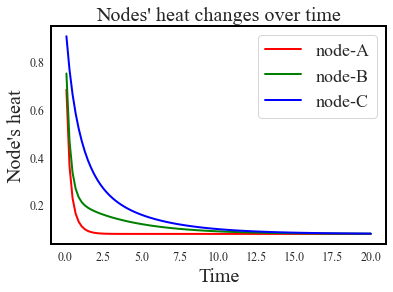

In [36]:
taus = np.linspace(0.1, 20, 100)
heat_lines = compute_distribute(taus)
node_num = 13
node_lines = [[] for i in range(node_num)]
for heat_line in heat_lines:
    for i in range(node_num):
        node_lines[i].append(heat_line[i,i])

# for item in node_lines:
#     print(item)


# for node_index,node_line in enumerate(node_lines):
#     plt.plot(taus,node_line, label=f"node-{node_index}")

# plt.plot(taus,node_lines[0], label=f"node-{0}")
# plt.plot(taus,node_lines[1], label=f"node-{1}")


# plt.rc('font', family='Times New Roman')

# plt.box(False)

# fig = plt.figure(figsize=(8, 8))
# #使用axisartist.Subplot方法创建一个绘图区对象ax
# ax = axisartist.Subplot(fig, 111)  
# #将绘图区对象添加到画布中
# fig.add_axes(ax)

plt.grid(False)
plt.xlabel('Time')
plt.ylabel('Node\'s heat')
plt.title('Nodes\' heat changes over time' )
plt.plot(taus,node_lines[0], label=f"node-A")
plt.plot(taus,node_lines[4], label=f"node-B")
plt.plot(taus,node_lines[8], label=f"node-C")


# ax.axis[:].set_visible(False)#通过set_visible方法设置绘图区所有坐标轴隐藏
# ax.axis["x"] = ax.new_floating_axis(0,0)#ax.new_floating_axis代表添加新的坐标轴
# ax.axis["x"].set_axisline_style("->", size = 1.0)#给x坐标轴加上箭头
# #添加y坐标轴，且加上箭头
# ax.axis["y"] = ax.new_floating_axis(0,0)
# ax.axis["y"].set_axisline_style("->", size = 1.0)



ax=plt.gca()  #gca:get current axis得到当前轴
# #设置图片的右边框和上边框为不显示
# ax.spines['right'].set_color('none')
# ax.spines['top'].set_color('none')
# ax.spines['left'].set_color('none')
# ax.spines['bottom'].set_color('none')


plt.legend(loc='upper right')
file_name = rw_directory.result_path(10, "heat_curve.pdf")

plt.savefig(file_name)